# 4. 인구 데이터 분석
* 인구수 변동 현황
* 가장 인구수가 늘어난 지역은?
* 가장 인구수가 줄어든 지역은?
* 가장 10~20대가 많은 지역은?
* 노인 연령층이 높은 지역은?
* 아이와 노인의 비율은?

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv('population.csv',thousands=',')
df

,행정구역,2011년_총인구수,2011년_세대수,2011년_세대당 인구,2011년_남자 인구수,2011년_여자 인구수,2011년_남여 비율,2012년_총인구수,2012년_세대수,2012년_세대당 인구,...,2019년_세대당 인구,2019년_남자 인구수,2019년_여자 인구수,2019년_남여 비율,2020년_총인구수,2020년_세대수,2020년_세대당 인구,2020년_남자 인구수,2020년_여자 인구수,2020년_남여 비율
0,전국,50734284,20033142,2.53,25406934,25327350,1.00,50948272,20211770,2.52,...,2.31,25864816,25985045,1.00,51829023,23093108,2.24,25841029,25987994,0.99
1,서울,10249679,4192752,2.44,5073899,5175780,0.98,10195318,4177970,2.44,...,2.25,4744059,4985048,0.95,9668465,4417954,2.19,4701723,4966742,0.95
2,부산,3550963,1381257,2.57,1762848,1788115,0.99,3538484,1389526,2.55,...,2.28,1675417,1738424,0.96,3391946,1530431,2.22,1661000,1730946,0.96
3,대구,2507271,940770,2.67,1251577,1255694,1.00,2505644,948652,2.64,...,2.36,1205286,1232745,0.98,2418346,1056627,2.29,1193109,1225237,0.97
4,인천,2801274,1077563,2.60,1410980,1390294,1.01,2843981,1097491,2.59,...,2.39,1482249,1474777,1.01,2942828,1267956,2.32,1473943,1468885,1.00
5,광주,1463464,549105,2.67,725606,737858,0.98,1469216,555538,2.64,...,2.36,720740,735728,0.98,1450062,633582,2.29,717348,732714,0.98
6,대전,1515603,566324,2.68,759188,756415,1.00,1524583,575600,2.65,...,2.32,736607,738263,1.00,1463882,652783,2.24,730699,733183,1.00
7,울산,1135494,412561,2.75,583825,551669,1.06,1147256,422177,2.72,...,2.45,589712,558307,1.06,1136017,476893,2.38,583708,552309,1.06
8,세종,0,0,0.00,0,0,0.00,113117,46592,2.43,...,2.52,169845,170730,0.99,355831,144275,2.47,177568,178263,1.00
9,경기,11937415,4579405,2.61,6015357,5922058,1.02,12093299,4639665,2.61,...,2.42,6659995,6579671,1.01,13427014,5676401,2.37,6754469,6672545,1.01


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 61 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   행정구역          18 non-null     object 
 1   2011년_총인구수    18 non-null     int64  
 2   2011년_세대수     18 non-null     int64  
 3   2011년_세대당 인구  18 non-null     float64
 4   2011년_남자 인구수  18 non-null     int64  
 5   2011년_여자 인구수  18 non-null     int64  
 6   2011년_남여 비율   18 non-null     float64
 7   2012년_총인구수    18 non-null     int64  
 8   2012년_세대수     18 non-null     int64  
 9   2012년_세대당 인구  18 non-null     float64
 10  2012년_남자 인구수  18 non-null     int64  
 11  2012년_여자 인구수  18 non-null     int64  
 12  2012년_남여 비율   18 non-null     float64
 13  2013년_총인구수    18 non-null     int64  
 14  2013년_세대수     18 non-null     int64  
 15  2013년_세대당 인구  18 non-null     float64
 16  2013년_남자 인구수  18 non-null     int64  
 17  2013년_여자 인구수  18 non-null     int64  
 18  2013년_남여 비율   18 non-null     fl

In [33]:
df.head()

,행정구역,2011년_총인구수,2011년_세대수,2011년_세대당 인구,2011년_남자 인구수,2011년_여자 인구수,2011년_남여 비율,2012년_총인구수,2012년_세대수,2012년_세대당 인구,...,2019년_세대당 인구,2019년_남자 인구수,2019년_여자 인구수,2019년_남여 비율,2020년_총인구수,2020년_세대수,2020년_세대당 인구,2020년_남자 인구수,2020년_여자 인구수,2020년_남여 비율
0,전국,50734284,20033142,2.53,25406934,25327350,1.00,50948272,20211770,2.52,...,2.31,25864816,25985045,1.00,51829023,23093108,2.24,25841029,25987994,0.99
1,서울,10249679,4192752,2.44,5073899,5175780,0.98,10195318,4177970,2.44,...,2.25,4744059,4985048,0.95,9668465,4417954,2.19,4701723,4966742,0.95
2,부산,3550963,1381257,2.57,1762848,1788115,0.99,3538484,1389526,2.55,...,2.28,1675417,1738424,0.96,3391946,1530431,2.22,1661000,1730946,0.96
3,대구,2507271,940770,2.67,1251577,1255694,1.00,2505644,948652,2.64,...,2.36,1205286,1232745,0.98,2418346,1056627,2.29,1193109,1225237,0.97
4,인천,2801274,1077563,2.60,1410980,1390294,1.01,2843981,1097491,2.59,...,2.39,1482249,1474777,1.01,2942828,1267956,2.32,1473943,1468885,1.00


In [34]:
# id_vars : 기준이 되는 컬럼
# value-vars : 컬럼이 녹아서 값과 같이 행으로 내려가는 컬럼
df_2011 = pd.melt(df, id_vars=['행정구역'], value_vars=['2011년_총인구수'], var_name='년도', value_name='인구수')
df_2011.년도 = 2011
df_2011

,행정구역,년도,인구수
0,전국,2011,50734284
1,서울,2011,10249679
2,부산,2011,3550963
3,대구,2011,2507271
4,인천,2011,2801274
5,광주,2011,1463464
6,대전,2011,1515603
7,울산,2011,1135494
8,세종,2011,0
9,경기,2011,11937415


In [35]:
df_2011_m = pd.melt(df, id_vars=['행정구역'], value_vars=['2011년_남자 인구수'], var_name='년도', value_name='남자')
df_2011_m.년도 = 2011
df_2011_m

,행정구역,년도,남자
0,전국,2011,25406934
1,서울,2011,5073899
2,부산,2011,1762848
3,대구,2011,1251577
4,인천,2011,1410980
5,광주,2011,725606
6,대전,2011,759188
7,울산,2011,583825
8,세종,2011,0
9,경기,2011,6015357


In [36]:
df_2011_f = pd.melt(df, id_vars=['행정구역'], value_vars=['2011년_여자 인구수'], var_name='년도', value_name='여자')
df_2011_f.년도 = 2011
df_2011_f

,행정구역,년도,여자
0,전국,2011,25327350
1,서울,2011,5175780
2,부산,2011,1788115
3,대구,2011,1255694
4,인천,2011,1390294
5,광주,2011,737858
6,대전,2011,756415
7,울산,2011,551669
8,세종,2011,0
9,경기,2011,5922058


In [37]:
df_2011_all = pd.merge(df_2011, df_2011_m, on=['행정구역', '년도'], how='inner')
df_2011_all

,행정구역,년도,인구수,남자
0,전국,2011,50734284,25406934
1,서울,2011,10249679,5073899
2,부산,2011,3550963,1762848
3,대구,2011,2507271,1251577
4,인천,2011,2801274,1410980
5,광주,2011,1463464,725606
6,대전,2011,1515603,759188
7,울산,2011,1135494,583825
8,세종,2011,0,0
9,경기,2011,11937415,6015357


In [38]:
df_2011_all = pd.merge(df_2011_all, df_2011_f, on=['행정구역', '년도'], how='inner')
df_2011_all

,행정구역,년도,인구수,남자,여자
0,전국,2011,50734284,25406934,25327350
1,서울,2011,10249679,5073899,5175780
2,부산,2011,3550963,1762848,1788115
3,대구,2011,2507271,1251577,1255694
4,인천,2011,2801274,1410980,1390294
5,광주,2011,1463464,725606,737858
6,대전,2011,1515603,759188,756415
7,울산,2011,1135494,583825,551669
8,세종,2011,0,0,0
9,경기,2011,11937415,6015357,5922058


In [39]:
def population(n):
    # 인구수
    df_temp = pd.melt(df, id_vars=['행정구역'], value_vars=[str(n) +'년_총인구수'], var_name='년도', value_name='인구수')
    df_temp.년도 = n
    # 남자 인구수
    df_temp_m = pd.melt(df, id_vars=['행정구역'], value_vars=[str(n) + '년_남자 인구수'], var_name='년도', value_name='남자')
    df_temp_m.년도 = n
    # 여자인구수
    df_temp_f = pd.melt(df, id_vars=['행정구역'], value_vars=[str(n) + '년_여자 인구수'], var_name='년도', value_name='여자')
    df_temp_f.년도 = n
    
    # merge
    df_temp = pd.merge(df_temp, df_temp_m, on=['행정구역', '년도'], how='inner')
    globals()['df_{}_all'.format(n)] = df_temp = pd.merge(df_temp, df_temp_f, on=['행정구역', '년도'], how='inner')
    
    # df_2011_al, df_2012_all, ... , df_2020_all

In [40]:
for i in range(2012, 2021):
    population(i)

In [41]:
df_2020_all

,행정구역,년도,인구수,남자,여자
0,전국,2020,51829023,25841029,25987994
1,서울,2020,9668465,4701723,4966742
2,부산,2020,3391946,1661000,1730946
3,대구,2020,2418346,1193109,1225237
4,인천,2020,2942828,1473943,1468885
5,광주,2020,1450062,717348,732714
6,대전,2020,1463882,730699,733183
7,울산,2020,1136017,583708,552309
8,세종,2020,355831,177568,178263
9,경기,2020,13427014,6754469,6672545


In [42]:
# df_2012_all ~ df_2020_all 합치기
df_all = pd.concat([df_2011_all, df_2020_all])
df_all

,행정구역,년도,인구수,남자,여자
0,전국,2011,50734284,25406934,25327350
1,서울,2011,10249679,5073899,5175780
2,부산,2011,3550963,1762848,1788115
3,대구,2011,2507271,1251577,1255694
4,인천,2011,2801274,1410980,1390294
5,광주,2011,1463464,725606,737858
6,대전,2011,1515603,759188,756415
7,울산,2011,1135494,583825,551669
8,세종,2011,0,0,0
9,경기,2011,11937415,6015357,5922058


In [45]:
for n in range(2013, 2021):
    df_all = pd.concat([df_all, globals()['df_{}_all'.format(n)]])
df_all

,행정구역,년도,인구수,남자,여자
0,전국,2011,50734284,25406934,25327350
1,서울,2011,10249679,5073899,5175780
2,부산,2011,3550963,1762848,1788115
3,대구,2011,2507271,1251577,1255694
4,인천,2011,2801274,1410980,1390294
...,...,...,...,...,...
13,전북,2020,1804104,896874,907230
14,전남,2020,1851549,930615,920934
15,경북,2020,2639422,1329211,1310211
16,경남,2020,3340216,1681423,1658793


<AxesSubplot:xlabel='년도', ylabel='인구수'>

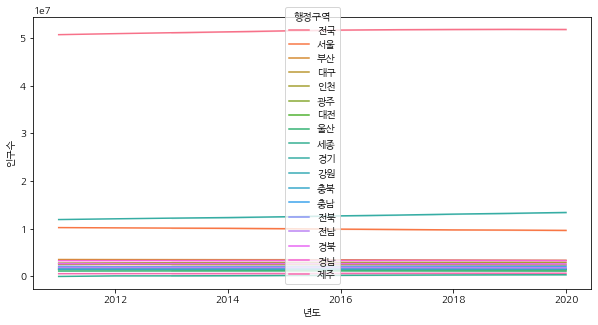

In [46]:
# 2011 ~ 2020년 인구 증가 추세
plt.figure(figsize=(10, 5))
sns.lineplot(x='년도', y='인구수', hue='행정구역', data=df_all)